<a href="https://colab.research.google.com/github/NicoGangi5/Introduction_to_Deep_Learning_-_Neural_Networks_with_Keras/blob/main/ClassificationModelswithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Train: ", X_train.shape)
print("Test: ", X_test.shape)

Train:  (60000, 28, 28)
Test:  (10000, 28, 28)


In [ ]:
type(X_train)

numpy.ndarray

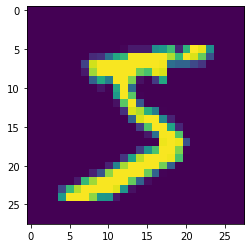

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [ ]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 12s - loss: 0.1945 - accuracy: 0.9412 - val_loss: 0.0912 - val_accuracy: 0.9703
Epoch 2/10
1875/1875 - 12s - loss: 0.0853 - accuracy: 0.9735 - val_loss: 0.0782 - val_accuracy: 0.9774
Epoch 3/10
1875/1875 - 12s - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0720 - val_accuracy: 0.9796
Epoch 4/10
1875/1875 - 12s - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0842 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 - 12s - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0847 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 - 12s - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0613 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 - 12s - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0674 - val_accuracy: 0.9821
Epoch 8/10
1875/1875 - 12s - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0737 - val_accuracy: 0.9828
Epoch 9/10
1875/1875 - 12s - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0764 - val_accuracy: 0.9809
Epoch 10/10
1875/1875 - 12s - loss: 0.0193 - accuracy: 0.9939 - val_loss:

In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9811999797821045% 
 Error: 0.018800020217895508


In [ ]:
model.save('classification_model.h5')

In [ ]:
from keras.models import load_model

pretrained_model = load_model('classification_model.h5')